In [13]:
# import packages
from deep_neural_network import neural_network
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io
from testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

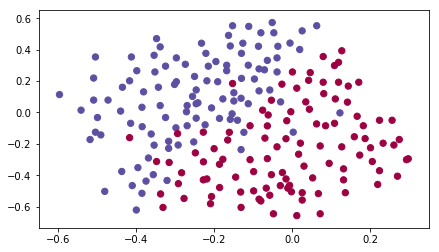

In [14]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

In [15]:
#Functions to be used later

def show_costs(costs, learning_rate):
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

def plot_decision_boundary(nn, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = np.c_[xx.ravel(), yy.ravel()]
    Z = nn.predict(Z.T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
             
    plt.xlim([-0.75,0.40])
    plt.ylim([-0.75,0.65])

    plt.show()

    '''
def plot_decision_boundary(nn, X, y):
    x_min = np.min(X[0,:]) - 1
    x_max = np.max(X[0,:]) + 1
    y_min = np.min(X[1,:]) - 1
    y_max = np.max(X[1,:]) + 1
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min,x_max, h), np.arange(y_min, y_max, h))
    
    X = np.c_[xx.ravel(), yy.ravel()]
    Z = nn.predict(X)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx,yy,Z,cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    plt.show()'''
    
def model(train_x, train_y, test_x, test_y, layer_dims, learning_rate, num_iterations, initialization = 'standard', lambd = 0, keep_prob = 1):
    np.random.seed(3)
    nn = neural_network(layer_dims, initialization = initialization, lambd = lambd, keep_prob = keep_prob)
    print(nn)

    np.random.seed(1)
    costs = nn.train(train_x, train_y, learning_rate = learning_rate, num_iterations = num_iterations, print_costs=True)

    show_costs(costs, learning_rate=learning_rate)

    train_predict = nn.predict(train_x)
    test_predict = nn.predict(test_x)

    neural_network.print_accuracy(train_predict,train_y,"Train")
    neural_network.print_accuracy(test_predict,test_y,'Test')
    
    plot_decision_boundary(nn, train_x, train_y)
    return nn



Layer: 1
	W.shape = (20, 2)
	b.shape = (20, 1)
	activation function = relu
	keep_prob: 1
	lambda: 0

Layer: 2
	W.shape = (3, 20)
	b.shape = (3, 1)
	activation function = relu
	keep_prob: 1
	lambda: 0

Layer: 3
	W.shape = (1, 3)
	b.shape = (1, 1)
	activation function = sigmoid
	keep_prob: 1
	lambda: 0


Cost after iteration 0: 0.6557412523481002
Cost after iteration 10000: 0.16329987525724207
Cost after iteration 20000: 0.1385164242325307


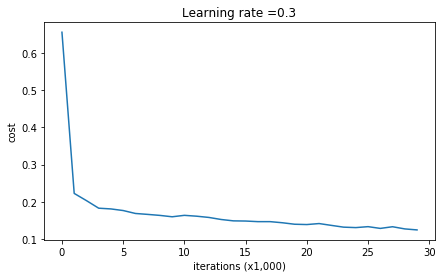

Train accuracy: 94.79%
Test accuracy: 91.50%


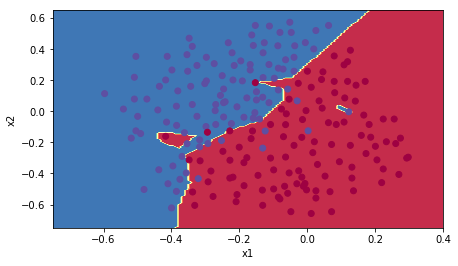

In [16]:
# Baseline
layers_dims = [train_X.shape[0], 20, 3, 1]
nn = model(train_X, train_Y, test_X, test_Y, layers_dims, learning_rate = 0.3, num_iterations = 30000, initialization='xavier', keep_prob = 1)

Layer: 1
	W.shape = (20, 2)
	b.shape = (20, 1)
	activation function = relu
	keep_prob: 1
	lambda: 0.7

Layer: 2
	W.shape = (3, 20)
	b.shape = (3, 1)
	activation function = relu
	keep_prob: 1
	lambda: 0.7

Layer: 3
	W.shape = (1, 3)
	b.shape = (1, 1)
	activation function = sigmoid
	keep_prob: 1
	lambda: 0.7


Cost after iteration 0: 0.6974676007653016
Cost after iteration 10000: 0.2684984150907817
Cost after iteration 20000: 0.2680976063785051


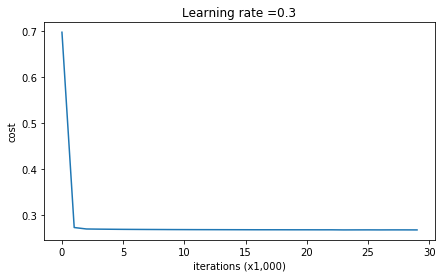

Train accuracy: 93.84%
Test accuracy: 93.00%


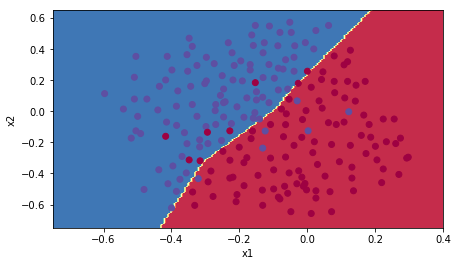

In [17]:
# L2 regularization
layers_dims = [train_X.shape[0], 20, 3, 1]
nn = model(train_X, train_Y, test_X, test_Y, layers_dims, learning_rate = 0.3, num_iterations = 30000, initialization='xavier', lambd = 0.7)

Layer: 1
	W.shape = (20, 2)
	b.shape = (20, 1)
	activation function = relu
	keep_prob: 0.86
	lambda: 0

Layer: 2
	W.shape = (3, 20)
	b.shape = (3, 1)
	activation function = relu
	keep_prob: 0.86
	lambda: 0

Layer: 3
	W.shape = (1, 3)
	b.shape = (1, 1)
	activation function = sigmoid
	keep_prob: 1
	lambda: 0


Cost after iteration 0: 0.6543912405149825
Cost after iteration 10000: 0.06101708610102172
Cost after iteration 20000: 0.06058259219669558


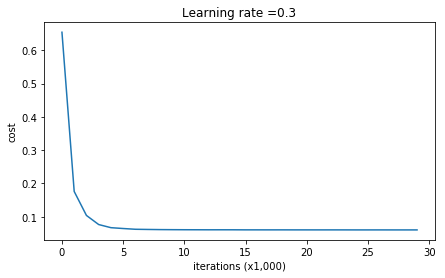

Train accuracy: 92.89%
Test accuracy: 95.00%


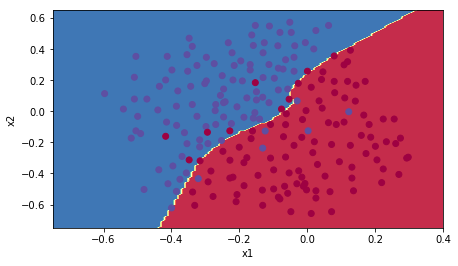

In [18]:
# Testing dropout
layers_dims = [train_X.shape[0], 20, 3, 1]
nn = model(train_X, train_Y, test_X, test_Y, layers_dims, learning_rate = 0.3, num_iterations = 30000, initialization='xavier', keep_prob = 0.86)